In [ ]:
from skimage.io import imread
import os
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [ ]:
os.listdir("/content/drive/MyDrive/Datasets/Brain_Tumor/Testing")

['pituitary', 'notumor', 'meningioma', 'glioma']

In [ ]:
os.listdir("/content/drive/MyDrive/Datasets/Brain_Tumor/Training")

['glioma', 'pituitary', 'notumor', 'meningioma']

In [ ]:
datapath="/content/drive/MyDrive/Datasets/Brain_Tumor/Training"

In [ ]:
X_train=[] #to store corresponding y values
y_train=[] # to know wheather it is pituitary, glioma etc

categories=['pituitary', 'notumor', 'meningioma', 'glioma']
for category in categories:
  subdirpath=os.path.join(datapath,category)
  #print(subdirpath)
  images=os.listdir(subdirpath)
  #print(images)
  for img in images:
    imgpath=os.path.join(subdirpath,img)
    #print(imgpath)
    img_array=imread(imgpath)
    #print(img_array)
    resized_img=resize(img_array,(150,150,1)) # 1 because img is gray scale
    X_train.append(resized_img)
    y_train.append(categories.index(category))
  print("Loaded.......",category)


Loaded....... pituitary
Loaded....... notumor
Loaded....... meningioma
Loaded....... glioma


In [ ]:
X_test=[]
y_test=[]

datapath="/content/drive/MyDrive/Datasets/Brain_Tumor/Testing"   #testing

Categories=['pituitary', 'notumor', 'meningioma', 'glioma']

for category in categories:
  subdirpath=os.path.join(datapath,category)
  #print(subdirpath)
  images=os.listdir(subdirpath)
  print(images)
  for img in images:
    imgpath=os.path.join(subdirpath,img)
    #print(imgpath)
    img_array=imread(imgpath)
    resized_img=resize(img_array,(150,150,1))
    X_test.append(resized_img)
    y_test.append(categories.index(category))
  print("Loaded..........",category)

['Te-pi_0029.jpg', 'Te-pi_0168.jpg', 'Te-pi_0067.jpg', 'Te-pi_0282.jpg', 'Te-pi_0224.jpg', 'Te-pi_0175.jpg', 'Te-pi_0061.jpg', 'Te-pi_0233.jpg', 'Te-pi_0065.jpg', 'Te-pi_0068.jpg', 'Te-pi_0046.jpg', 'Te-pi_0121.jpg', 'Te-pi_0178.jpg', 'Te-pi_0234.jpg', 'Te-pi_0059.jpg', 'Te-pi_0277.jpg', 'Te-pi_0202.jpg', 'Te-pi_0220.jpg', 'Te-pi_0229.jpg', 'Te-pi_0118.jpg', 'Te-pi_0035.jpg', 'Te-pi_0092.jpg', 'Te-pi_0179.jpg', 'Te-pi_0051.jpg', 'Te-pi_0130.jpg', 'Te-pi_0141.jpg', 'Te-pi_0273.jpg', 'Te-pi_0206.jpg', 'Te-pi_0041.jpg', 'Te-pi_0222.jpg', 'Te-pi_0053.jpg', 'Te-pi_0267.jpg', 'Te-pi_0052.jpg', 'Te-pi_0120.jpg', 'Te-pi_0248.jpg', 'Te-pi_0147.jpg', 'Te-pi_0192.jpg', 'Te-pi_0232.jpg', 'Te-pi_0161.jpg', 'Te-pi_0069.jpg', 'Te-pi_0028.jpg', 'Te-pi_0207.jpg', 'Te-piTr_0001.jpg', 'Te-pi_0064.jpg', 'Te-pi_0106.jpg', 'Te-pi_0039.jpg', 'Te-pi_0237.jpg', 'Te-pi_0251.jpg', 'Te-pi_0235.jpg', 'Te-pi_0105.jpg', 'Te-pi_0278.jpg', 'Te-pi_0226.jpg', 'Te-pi_0055.jpg', 'Te-pi_0187.jpg', 'Te-pi_0045.jpg', 'Te-pi_

In [ ]:
len(X_train),len(y_train)

(5529, 5529)

In [ ]:
len(X_test),len(y_test)

(1311, 1311)

In [ ]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
X_train.shape

(5529, 150, 150, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6788 - loss: 1.0278
Epoch 2/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9393 - loss: 0.1894
Epoch 3/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9774 - loss: 0.0781
Epoch 4/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9952 - loss: 0.0255
Epoch 5/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9970 - loss: 0.0178
Epoch 6/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9986 - loss: 0.0094
Epoch 7/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9999 - loss: 0.0030
Epoch 8/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9992 - loss: 0.0059
Epoch 9/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9998 - loss: 0.0018
Epoch 10/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9854 - loss: 0.0506
Epoch 11/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9945 - loss: 0.0202
Epoch 12/20
346/346 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
model.evaluate(X_test,y_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9769 - loss: 0.1468


[0.2871116101741791, 0.950419545173645]

array([[[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       [[22, 22, 22],
        [22, 22, 22],
        [22, 22, 22],
        ...,
        [21, 21, 21],
        [21, 21, 21],
        [21, 21, 21]],

       ...,

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]],

       [[23, 23, 23],
        [23, 23, 23],
        [23, 23, 23],
        ...,
        [23, 23, 23],
        [23, 23, 23],
        [23, 23, 23]]], dtype=uint8)
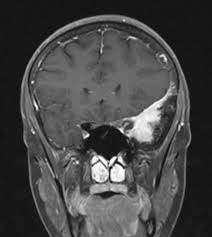

In [ ]:
imgpath="/content/drive/MyDrive/Datasets/Brain_Tumor/Testing/meningioma/Te-meTr_0003.jpg"
img=imread(imgpath)
img

In [ ]:
img=resize(img,(150,150,1))
img

array([[[0.08627451],
        [0.08627451],
        [0.08627451],
        ...,
        [0.08235294],
        [0.08235294],
        [0.08235294]],

       [[0.08627451],
        [0.08627451],
        [0.08627451],
        ...,
        [0.08235294],
        [0.08235294],
        [0.08235294]],

       [[0.08627451],
        [0.08627451],
        [0.08627451],
        ...,
        [0.08235294],
        [0.08235294],
        [0.08235294]],

       ...,

       [[0.09021446],
        [0.09021161],
        [0.09020512],
        ...,
        [0.09046585],
        [0.09020527],
        [0.09020527]],

       [[0.09019608],
        [0.09019608],
        [0.09019608],
        ...,
        [0.09045758],
        [0.09019608],
        [0.09019608]],

       [[0.09019608],
        [0.09019608],
        [0.09019608],
        ...,
        [0.09045758],
        [0.09019608],
        [0.09019608]]])

In [ ]:
X_train.shape

(5529, 150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)

In [ ]:
y_new=model.predict(img)
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[3.5695585e-11, 4.9922008e-13, 1.0000000e+00, 3.2407470e-08]],
      dtype=float32)

In [ ]:
ind=y_new.argmax(axis=1)
ind

array([2])

In [ ]:
categories[ind.item()]

'meningioma'